In [1]:
import pandas as pd
mise=pd.read_excel('2018Q1.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '2018Q1.xlsx'

In [4]:
new = mise['지역'].str.split(' ', n = 1, expand = True)  #공백으로 한번만 쪼개기  ex) '대전 광역시' 하면 new[0] = 대전 / new[1] = 광역시
mise['시도'] = new[0] #시도라는 새로운 변수 만들어줌
mise['시군구'] = new[1]

In [5]:
#연도 월 일 시간을 쪼갠거
date = mise['측정일시'].astype(str) #측정일시가 숫자로 돼있어서 문자로 바꿈
mise['연도'] = date.str.slice(start=0, stop=4).astype(str)
mise['월'] = date.str.slice(start=4, stop=6).astype(str)
mise['일'] = date.str.slice(start=6, stop=8).astype(str)
mise['시간'] = date.str.slice(start=8, stop=10).astype(str)

In [6]:
mise0=mise.groupby(by=['시도','월','일']).max()  #시도 월 일 중 최대값만 가져옴

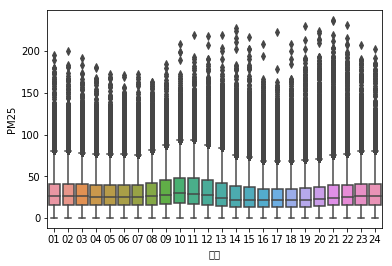

In [8]:
import seaborn as sns #boxplot 그려주는 페키지
A = sns.boxplot(x='시간',y='PM25',data=mise)
A

In [9]:
mise1 = mise[mise['시간']== '11'] #11시가 가장 미세먼지 심해서 따로 빼줌

Text(0.5, 1.0, '전국 미세먼지')

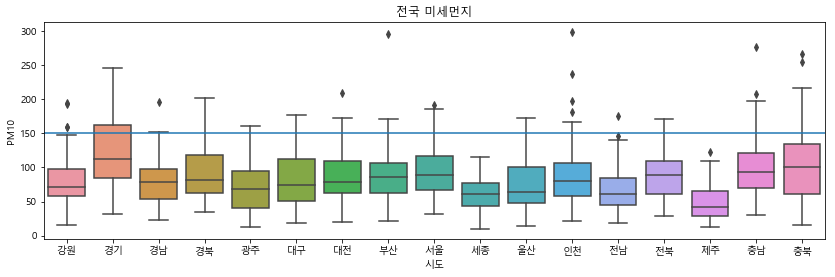

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,4) #set size of Graph

mise00 = mise1.groupby(by=['시도','월','일']).max()
mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
sns.boxplot(x='시도',y='PM10',data=mise00) #PM10은 그냥 미세먼지 
plt.axhline(151) #일반 미세먼지 기준치 151
plt.title('전국 미세먼지')

Text(0.5, 1.0, '전국 초미세먼지')

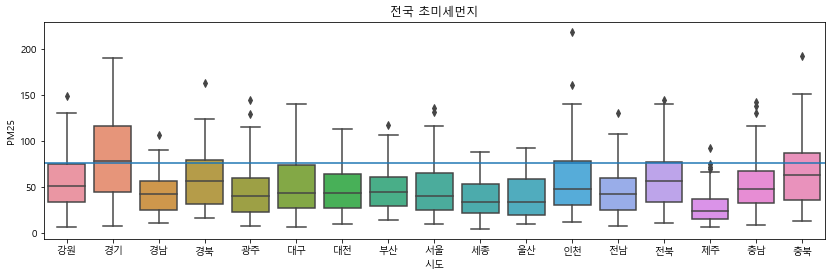

In [22]:
import matplotlib as mpl #한글파일 패치 - 홈페이지 빅데이터 누르면 코드 있음
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,4) #set size of Graph
###여기서 부터 관련 코드
mise00 = mise1.groupby(by=['시도','월','일']).max()  #11시 중 가장 큰 시도 월 일만 빼줌 
mise00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
ax1 = sns.boxplot(x='시도',y='PM25',data=mise00) #PM25는 초미세먼지
plt.axhline(76) # 기준치 76
plt.title('전국 초미세먼지')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, '경기도 시별 미세먼지')

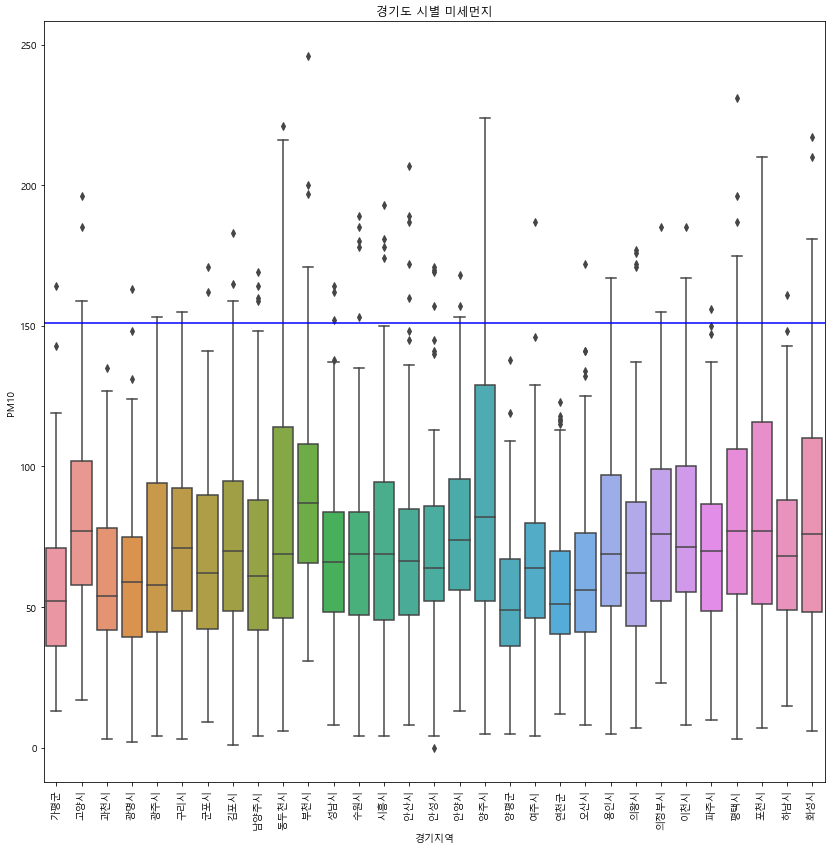

In [29]:
mise2 = mise[mise['시간']=='11'] # 전체 데이터에서 심한 시간인 11시만 따로 빼줌
mise3 = mise2[mise2['시도']=='경기'] # 11시만 따로 뺀 데이터에서 시도가 경기인 지역만 따로 빼줌
new = mise3['지역'].str.split(' ', n=1,expand=True) #지역 변수에서 칸 구분 ex) new[0] = 경기 / new[1] = 수원시
mise3['경기지역']=new[1] # 수원시 같이 나오는 것을 mise3 중 '경기지역'이라는 변수로 다시 할당
mise00_1 = mise3.groupby(by=['경기지역','월','일']).max() # 11시만 따로 빼고 경기만 있는 데이터 중 경기지역 중 월 중 일에서 가장 큰 값만 추출한 데이터 생성
mise00_1.reset_index(inplace=True) #  인덱스로 할당 된 경기지역,월,일을 다시 column으로 올려줌 
plt.rcParams["figure.figsize"]=(14,14) #한국어 패치
sns.boxplot(x='경기지역',y='PM10',data=mise00_1)# 각 구역에서 가장 심한날만 그래프 그림
plt.axhline(151,c='blue') # 그냥 미세먼지의 기준치 설정
plt.xticks(rotation=90) #
plt.title("경기도 시별 미세먼지") #제목 정해주기


Text(0.5, 1.0, '경기도 시별 초미세먼지')

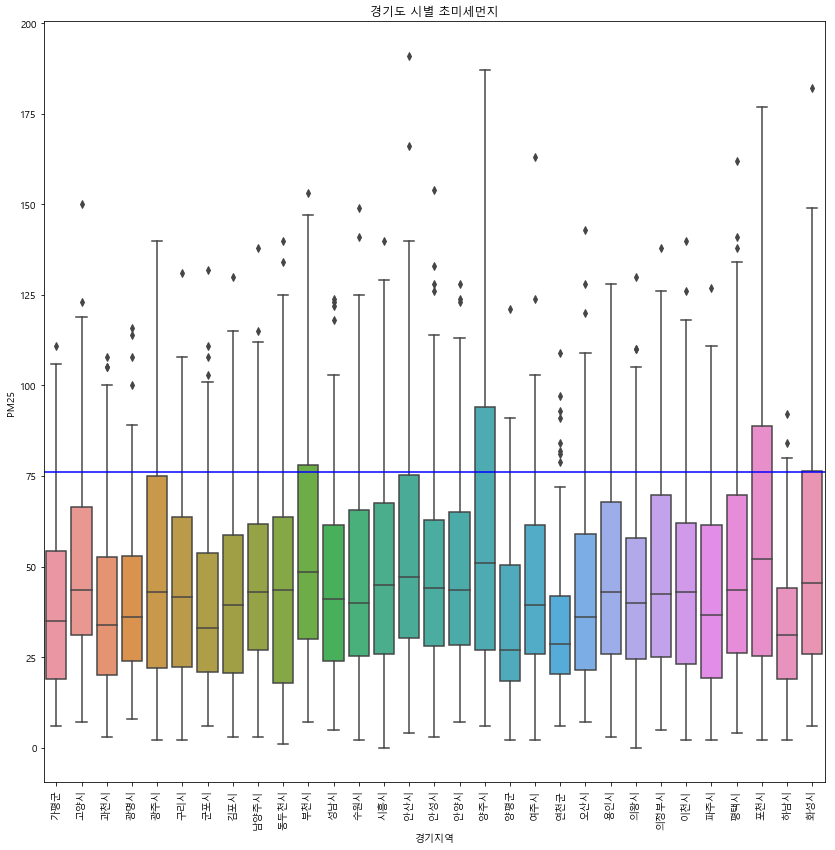

In [35]:
mise2 = mise[mise['시간']=='11']
mise2 = mise2[mise2['시도']=='경기']
new = mise2['지역'].str.split(' ', n=1,expand=True)
mise2['경기지역']=new[1]
mise00_1 = mise2.groupby(by=['경기지역','월','일']).max() #경기지역 중 월 중 일 중 제일 큰 값만 출력
mise00_1.reset_index(inplace=True)
plt.rcParams["figure.figsize"]=(14,14)
sns.boxplot(x='경기지역',y='PM25',data=mise00_1)
plt.axhline(76,c='blue')
plt.xticks(rotation=90)
plt.title("경기도 시별 초미세먼지")